<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Prediction_in_Basketball_Tournament_Comparison_Between_Machine_Learn_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparação de modelos em machine learning para prever resultados de torneios de basquete**: KNN, Decision Tree, SVM, e Logistic Regression

O objetivo deste projeto é aplicar algoritmos de Machine Learning ao conjunto de dados para identificar quais equipes de basquete universitário alcançar o **Final Four** do Torneio de Basquete Universitário, identificando qual modelo é mais adequado para resolver o problema. Pata tal, serão utilizados dados históricos dos torneios de basquete (`cbb.csv`).

A análise busca responder perguntas como: uma maior eficiência defensiva está diretamente relacionada à capacidade de chegar ao torneio? Qual seria o impacto da eficiência defensiva combinada ao total de vitórias?

A tarefa consiste em identificar possíveis combinações de métricas que aumentam significativamente as chances de uma equipe atingir este objetivo.

Prever os resultados de torneios de basquete é um desafio devido à grande quantidade de variáveis envolvidas. Modelos altamente precisos são raros e, no contexto da indústria de apostas esportivas, uma taxa de acerto superior a 55% já pode ser considerada interessante para apostas.

A análise envolve as seguintes etapas:

1. Carregar e limpar um conjunto de dados históricos de temporadas anteriores.
2. Aplicar diferentes algoritmos de classificação em _machine learn_ para construir modelos preditivos.

Os algoritmos utilizados são:

* [k-Nearest Neighbour (KNN)](https://github.com/SampMark/Machine-Learn/blob/main/K_Nearest_Neighbors.ipynb)
* [Decision Tree](https://github.com/SampMark/Machine-Learn/blob/main/Decision_Trees.ipynb)
* [Support Vector Machine (SVM)](https://github.com/SampMark/Machine-Learn/blob/main/SVM_Support_Vector_Machines.ipynb)
* [Logistic Regression](https://github.com/SampMark/Machine-Learn/blob/main/Logistic_Regression.ipynb)

Os resultados de cada modelo serão avaliados e comparados com base nas seguintes métricas:

* Acurácia
* Índice de Jaccard
* F1-score
* Log loss

Este código explora a aplicação prática de algoritmos em Machine Learning em um problema real, reforçando habilidades para limpeza de dados, análise preditiva e avaliação comparativa de modelagens.

## **Instalando e importando as bibliotecas**

---


In [1]:
!pip install scikit-learn scipy seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import itertools
from sklearn import preprocessing
import seaborn as sns

## **Sobre o dataset `cbb.csv`**

---


Este conjunto de dados é sobre o desempenho de times de basquete. O conjunto de dados `cbb.csv` inclui dados de desempenho sobre cinco temporadas de 354 times de basquete. Ele inclui os seguintes campos:

| Campo         | Descrição                                                                                                     | Tradução                                                                                           |
|---------------|-------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| TEAM          | The Division I college basketball school                                                                    | A escola de basquete universitário da Divisão I                                                  |
| CONF          | The Athletic Conference in which the school participates (e.g., ACC = Atlantic Coast Conference, etc.)       | A conferência atlética na qual a escola participa (ex.: ACC = Conferência da Costa Atlântica)     |
| G             | Number of games played                                                                                      | Número de jogos jogados                                                                          |
| W             | Number of games won                                                                                        | Número de jogos vencidos                                                                         |
| ADJOE         | Adjusted Offensive Efficiency (points scored per 100 possessions)                                           | Eficiência ofensiva ajustada (pontos marcados por 100 posses)                                    |
| ADJDE         | Adjusted Defensive Efficiency (points allowed per 100 possessions)                                          | Eficiência defensiva ajustada (pontos permitidos por 100 posses)                                 |
| BARTHAG       | Power Rating (Chance of beating an average Division I team)                                                 | Classificação de força (chance de vencer um time médio da Divisão I)                             |
| EFG_O         | Effective Field Goal Percentage Shot                                                                        | Porcentagem efetiva de arremessos de campo                                                       |
| EFG_D         | Effective Field Goal Percentage Allowed                                                                     | Porcentagem efetiva de arremessos de campo permitidos                                            |
| TOR           | Turnover Percentage Allowed (Turnover Rate)                                                                 | Porcentagem de erros permitidos (taxa de erros)                                                  |
| TORD          | Turnover Percentage Committed (Steal Rate)                                                                  | Porcentagem de erros cometidos (taxa de roubos)                                                  |
| ORB           | Offensive Rebound Percentage                                                                                | Porcentagem de rebotes ofensivos                                                                |
| DRB           | Defensive Rebound Percentage                                                                                | Porcentagem de rebotes defensivos                                                               |
| FTR           | Free Throw Rate (How often the team shoots Free Throws)                                                     | Taxa de lances livres (frequência com que o time realiza lances livres)                         |
| FTRD          | Free Throw Rate Allowed                                                                                     | Taxa de lances livres permitidos                                                                |
| 2P_O          | Two-Point Shooting Percentage                                                                               | Porcentagem de arremessos de dois pontos                                                        |
| 2P_D          | Two-Point Shooting Percentage Allowed                                                                      | Porcentagem de arremessos de dois pontos permitidos                                             |
| 3P_O          | Three-Point Shooting Percentage                                                                             | Porcentagem de arremessos de três pontos                                                        |
| 3P_D          | Three-Point Shooting Percentage Allowed                                                                    | Porcentagem de arremessos de três pontos permitidos                                             |
| ADJ_T         | Adjusted Tempo (possessions per 40 minutes)                                                                 | Ritmo ajustado (posses por 40 minutos)                                                          |
| WAB           | Wins Above Bubble (cutoff for NCAA March Madness Tournament)                                                | Vitórias acima do corte (para o torneio NCAA March Madness)                                     |
| POSTSEASON    | Round where the team was eliminated or season ended (e.g., R64 = Round of 64, etc.)                         | Rodada em que o time foi eliminado ou terminou a temporada (ex.: R64 = Rodada de 64)            |
| SEED          | Seed in the NCAA March Madness Tournament                                                                   | Cabeça de chave no torneio NCAA March Madness                                                   |
| YEAR          | Season                                                                                                      | Temporada                                                                                       |

Conferência Atlética da qual a escola participa:

| Sigla  | Descrição                                |
|--------|------------------------------------------|
| A10    | Atlantic 10                              |
| ACC    | Atlantic Coast Conference                |
| AE     | America East                             |
| Amer   | American                                 |
| ASun   | ASUN                                     |
| B10    | Big Ten                                  |
| B12    | Big 12                                   |
| BE     | Big East                                 |
| BSky   | Big Sky                                  |
| BSth   | Big South                                |
| BW     | Big West                                 |
| CAA    | Colonial Athletic Association           |
| CUSA   | Conference USA                           |
| Horz   | Horizon League                           |
| Ivy    | Ivy League                               |
| MAAC   | Metro Atlantic Athletic Conference       |
| MAC    | Mid-American Conference                  |
| MEAC   | Mid-Eastern Athletic Conference          |
| MVC    | Missouri Valley Conference               |
| MWC    | Mountain West                            |
| NEC    | Northeast Conference                     |
| OVC    | Ohio Valley Conference                   |
| P12    | Pac-12                                   |
| Pat    | Patriot League                           |
| SB     | Sun Belt                                 |
| SC     | Southern Conference                      |
| SEC    | South Eastern Conference                 |
| Slnd   | Southland Conference                     |
| Sum    | Summit League                            |
| SWAC   | Southwestern Athletic Conference         |
| WAC    | Western Athletic Conference              |
| WCC    | West Coast Conference                    |


## **Importando e explorando os dados**

---



In [2]:
# Carregando os dados
df = pd.read_csv('https://raw.githubusercontent.com/SampMark/files/refs/heads/main/cbb.csv')

# Exibindo informações sobre o DataFrame
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

O dataset contém 1406 linhas e 24 colunas.


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
# Exibindo informações resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

## **Pré-processamento e visualização dos dados**

---


Como o objetivo inicial é analisar o desempenho dos times de basquete, focando naqueles que alcançaram as fases finais do torneio: **S16** (Sweet Sixteen), **E8** (Elite Eight) e **F4** (Final Four). Para isso, vamos realizar os seguintes passos:

1. Criar uma nova coluna "WINDEX": essa coluna indicará se o time teve um desempenho acima da média, considerando o número de vitórias acima do "corte da bolha" (WAB - Wins Above Bubble). Se o time tiver mais de 7 vitórias acima do WAB, a coluna "WINDEX" receberá o valor "true", caso contrário, receberá "false".

2. Filtrar os dados: um novo DataFrame, chamado `df1`, será criado contendo apenas os times que chegaram às fases finais do torneio (Sweet Sixteen, Elite Eight e Final Four), juntamente com a nova coluna "WINDEX".

Essa análise permitirá investigar se existe uma relação entre o desempenho acima da média (WINDEX) e o sucesso do time nas fases finais do torneio.

A coluna `POSTSEASON`	contém as rodadas em que o time foi eliminado ou terminou a temporada.

In [4]:
# Cria a coluna 'WINDEX' com base na condição WAB > 7
df['WINDEX'] = np.where(df.WAB > 7, 'True', 'False')

# Filtra o DataFrame para incluir apenas as linhas com 'F4', 'S16' ou 'E8' em 'POSTSEASON'
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]

# Exibe as 5 primeiras linhas do DataFrame filtrado
print(df1.head().to_markdown(index=False, numalign="left", stralign="left"))

| TEAM       | CONF   | G   | W   | ADJOE   | ADJDE   | BARTHAG   | EFG_O   | EFG_D   | TOR   | TORD   | ORB   | DRB   | FTR   | FTRD   | 2P_O   | 2P_D   | 3P_O   | 3P_D   | ADJ_T   | WAB   | POSTSEASON   | SEED   | YEAR   | WINDEX   |
|:-----------|:-------|:----|:----|:--------|:--------|:----------|:--------|:--------|:------|:-------|:------|:------|:------|:-------|:-------|:-------|:-------|:-------|:--------|:------|:-------------|:-------|:-------|:---------|
| Notre Dame | ACC    | 36  | 24  | 118.3   | 103.3   | 0.8269    | 54      | 49.5    | 15.3  | 14.8   | 32.7  | 32.1  | 32.9  | 26     | 52.9   | 46.5   | 37.4   | 36.9   | 65.5    | 2.3   | E8           | 6      | 2016   | False    |
| Virginia   | ACC    | 37  | 29  | 119.9   | 91      | 0.96      | 54.8    | 48.4    | 15.1  | 18.8   | 29.9  | 25.2  | 32.1  | 33.4   | 52.6   | 46.3   | 40.3   | 34.7   | 61.9    | 8.6   | E8           | 1      | 2016   | True     |
| Kansas     | B12    | 37  | 32  | 120.9   | 90.4    | 

In [5]:
# Conta a frequência de cada valor único na coluna 'POSTSEASON' do DataFrame df1
df1['POSTSEASON'].value_counts()

,count
POSTSEASON,
S16,32
E8,16
F4,8


32 equipes chegaram ao **Sweet Sixteen**, 16 ao **Elite Eight** e 8 chegaram ao **Final Four** ao longo de 5 temporadas.

## **Análise Gráfica**

---

Os gráficos abaixo diferenciam os times que alcançaram diferentes estágios na pós-temporada:

* **S16**: Sweet Sixteen
* **E8**: Elite Eight
* **F4**: Final Four



### **Análise Gráfica para "Power Rating" (`BARTHAG`)**: chance de vencer um time médio da Divisão I

---



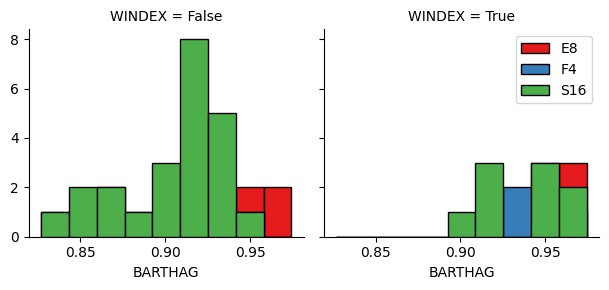

In [6]:
# BARTHAG	mede a classificação de força (chance de vencer um time médio da Divisão I)
# Definir os intervalos (bins) para o histograma
bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)

# Configurar o grid para os gráficos com bordas
g = sns.FacetGrid(df1, col="WINDEX", hue="POSTSEASON", palette="Set1", col_wrap=6)

# Adicionar os histogramas com bordas pretas ('edgecolor')
g.map(plt.hist, 'BARTHAG', bins=bins, edgecolor="black", ec="k")

# Adicionar a legenda e exibir os gráficos
g.axes[-1].legend()
plt.show()

Os gráficos acima representam a distribuição da classificação de força (medida pela métrica BARTHAG) dos times de basquete, divididos em duas categorias: `windex = False` (à esquerda) e `windex = True` (à direita).


Analisando os gráficos, podemos observar que:

1. `windex = False`: a maioria dos times que não atingiram as fases finais do torneio possuem uma classificação BARTHAG concentrada entre 0.85 e 0.92.
  * Em suma, times com BARTHAG mais alto (acima de 0.92) tiveram maior probabilidade de chegar pelo menos ao Sweet Sixteen.
2. `windex = True`: a maioria dos times que atingiram as fases finais do torneio possuem uma classificação BARTHAG mais alta, concentrada entre 0.90 e 0.95.
  * Em suma, times com BARTHAG acima de 0.90 tiveram maior probabilidade de chegar ao Elite Eight ou Final Four.

Portanto, os gráficos sugerem que existe uma correlação positiva entre a classificação de força BARTHAG e a probabilidade de um time avançar para as fases finais do torneio.

Times com `windex = True` (ou seja, com mais de 7 vitórias acima da "bolha") tendem a ter uma classificação BARTHAG mais alta e, consequentemente, maior probabilidade de sucesso no torneio.

In [7]:
# Filtra o DataFrame para incluir apenas as linhas onde 'WINDEX' é igual a 'True'
windex_true_df = df1[df1['WINDEX'] == 'True']

# Seleciona as colunas desejadas
selected_columns = ['TEAM', 'CONF', 'ADJOE', 'BARTHAG', 'POSTSEASON', 'YEAR', 'WINDEX']
filtered_df = windex_true_df[selected_columns]

# Ordena o DataFrame por 'BARTHAG' em ordem decrescente
filtered_df = filtered_df.sort_values('BARTHAG', ascending=False)

# Exibe o DataFrame resultante
print(filtered_df.to_markdown(index=False, numalign="left", stralign="left"))

| TEAM           | CONF   | ADJOE   | BARTHAG   | POSTSEASON   | YEAR   | WINDEX   |
|:---------------|:-------|:--------|:----------|:-------------|:-------|:---------|
| Michigan       | B10    | 114.6   | 0.9665    | S16          | 2019   | True     |
| Kansas         | B12    | 120.9   | 0.9662    | E8           | 2016   | True     |
| Duke           | ACC    | 118.9   | 0.9646    | E8           | 2019   | True     |
| Virginia       | ACC    | 119.9   | 0.96      | E8           | 2016   | True     |
| Michigan St.   | B10    | 119.9   | 0.9597    | F4           | 2019   | True     |
| North Carolina | ACC    | 120.1   | 0.9582    | S16          | 2019   | True     |
| Kentucky       | SEC    | 117.5   | 0.9568    | E8           | 2019   | True     |
| Kentucky       | SEC    | 118.3   | 0.9517    | E8           | 2017   | True     |
| Tennessee      | SEC    | 122.8   | 0.9488    | S16          | 2019   | True     |
| Purdue         | B10    | 123.2   | 0.9484    | S16          | 

### **Análise Gráfica para `ADJOE` (_Adjusted Offensive Efficiency_)**:	Eficiência ofensiva ajustada

---

Times com `WINDEX = True` (mais de 7 vitórias acima da "bolha"), geralmente, têm ADJOE (_Adjusted Offensive Efficiency_) mais alto, o parâmetro mede a eficiência ofensiva ajustada (pontos marcados por 100 posses), o que pode contribuir para seu sucesso.

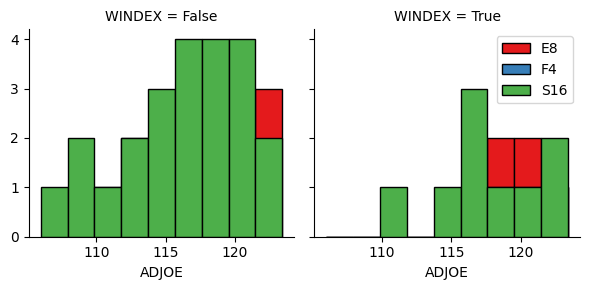

In [8]:
# ADJOE	(Adjusted Offensive Efficiency) mede a eficiência ofensiva ajustada (pontos marcados por 100 posses)
# Define os intervalos (bins) para o histograma
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)

# Configura o grid para os gráficos com bordas
g = sns.FacetGrid(df1, col="WINDEX", hue="POSTSEASON", palette="Set1", col_wrap=2)

# Adiciona os histogramas com bordas pretas ('edgecolor')
g.map(plt.hist, 'ADJOE', bins=bins, edgecolor="black", ec="k")

# Adiciona a legenda e exibe os gráficos
g.axes[-1].legend()
plt.show()

Os gráficos acima mostram a distribuição da eficiência ofensiva ajustada (ADJOE) dos times de basquete, divididos em duas categorias: WINDEX = False (esquerda) e WINDEX = True (direita).

* `WINDEX = False`: a maioria dos times que não atingiram as fases finais do torneio possuem ADJOE entre 110 e 120, com maior concentração entre 115 e 120.
  * Times com ADJOE mais alto (acima de 115) parecem ter maior probabilidade de chegar pelo menos ao Sweet Sixteen.

* `WINDEX = True`: times que atingiram as fases finais do torneio tendem a ter ADJOE mais alto, com a maioria entre 115 e 120.
  * Atingir o Elite Eight ou Final Four parece estar mais ligado a um ADJOE acima de 115.

Em suma, existe uma possível correlação positiva entre ADJOE e o sucesso nos playoffs. Times com maior eficiência ofensiva ajustada tendem a avançar mais no torneio.

### **Análise Gráfica para `ADJDE` (_Adjusted Defensive Efficiency_)**: Eficiência defensiva ajustada

---

Os gráficos abaixo ilustram a distribuição da eficiência defensiva ajustada (`ADJDE`) dos times de basquete, categorizados em `WINDEX = False` (esquerda) e `WINDEX = True` (direita).

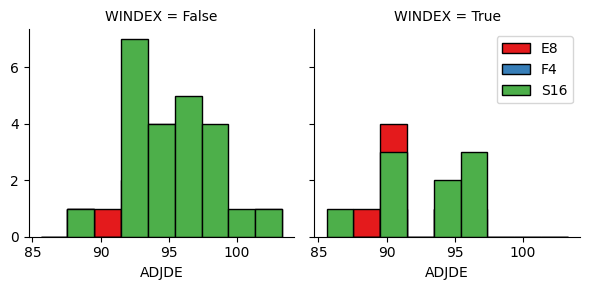

In [9]:
# ADJDE	(Adjusted Defensive Efficiency) mede a eficiência defensiva ajustada (pontos permitidos por 100 posses)
# Define os intervalos (bins) para o histograma
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)

# Configura o grid para os gráficos com bordas
g = sns.FacetGrid(df1, col="WINDEX", hue="POSTSEASON", palette="Set1", col_wrap=2)

# Adiciona os histogramas com bordas pretas ('edgecolor')
g.map(plt.hist, 'ADJDE', bins=bins, edgecolor="black", ec="k")

# Adiciona a legenda e exibe os gráficos
g.axes[-1].legend()
plt.show()

* `WINDEX = False`:  times que não chegaram às fases finais apresentam ADJDE variado, com concentração entre 95 e 100.  Times com ADJDE menor (mais eficiente defensivamente) tendem a avançar mais, chegando pelo menos ao Sweet Sixteen.

* `WINDEX = True`: Times que alcançaram as fases finais geralmente têm ADJDE mais baixo, concentrado entre 90 e 95.  Chegar ao Elite Eight ou Final Four parece estar associado a um ADJDE menor que 95.

Conclusões: há uma possível correlação negativa entre ADJDE e sucesso nos playoffs, essa variável não afeta a capacidade de um time de chegar à Final Four.

## **Convertendo variáveis categóricos em valores numéricos**

---



In [10]:
# Calcula a distribuição percentual de cada valor da coluna 'POSTSEASON' para cada grupo de 'WINDEX'
df1.groupby(['WINDEX'])['POSTSEASON'].value_counts(normalize=True)

WINDEX  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: proportion, dtype: float64

13,2% dos times com 6 ou menos vitórias acima da bolha chegam às quarta de finais, enquanto 16,67% dos times com 7 ou mais chegam.

Vamos converter vitórias acima da bolha (windex) abaixo de 7 para 0 e acima de 7 para 1:

In [11]:
# Converte os valores da coluna 'WINDEX' de 'False' e 'True' para 0 e 1, respectivamente
df1.loc[:, 'WINDEX'] = df1['WINDEX'].map({'False': 0, 'True': 1})

# Exibe as 5 primeiras linhas do DataFrame df1
print(df1.head().to_markdown(index=False, numalign="left", stralign="left"))
#df1.head()

| TEAM       | CONF   | G   | W   | ADJOE   | ADJDE   | BARTHAG   | EFG_O   | EFG_D   | TOR   | TORD   | ORB   | DRB   | FTR   | FTRD   | 2P_O   | 2P_D   | 3P_O   | 3P_D   | ADJ_T   | WAB   | POSTSEASON   | SEED   | YEAR   | WINDEX   |
|:-----------|:-------|:----|:----|:--------|:--------|:----------|:--------|:--------|:------|:-------|:------|:------|:------|:-------|:-------|:-------|:-------|:-------|:--------|:------|:-------------|:-------|:-------|:---------|
| Notre Dame | ACC    | 36  | 24  | 118.3   | 103.3   | 0.8269    | 54      | 49.5    | 15.3  | 14.8   | 32.7  | 32.1  | 32.9  | 26     | 52.9   | 46.5   | 37.4   | 36.9   | 65.5    | 2.3   | E8           | 6      | 2016   | 0        |
| Virginia   | ACC    | 37  | 29  | 119.9   | 91      | 0.96      | 54.8    | 48.4    | 15.1  | 18.8   | 29.9  | 25.2  | 32.1  | 33.4   | 52.6   | 46.3   | 40.3   | 34.7   | 61.9    | 8.6   | E8           | 1      | 2016   | 1        |
| Kansas     | B12    | 37  | 32  | 120.9   | 90.4    | 

## **Seleção das variáveis-chave**

---



Vamos definir conjuntos de recursos, X:

In [12]:
# Selecionando as colunas relevantes para o conjunto de dados de entrada (X)
selected_columns = [
    'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
    'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D',
    '3P_O', '3P_D', 'ADJ_T', 'WAB', 'SEED', 'WINDEX'
]

# Criando o DataFrame 'X' apenas com as colunas selecionadas
X = df1.loc[:, selected_columns]

# Exibindo as primeiras 5 linhas do DataFrame X
#X.head()
print(X.head().to_markdown(index=False, numalign="left", stralign="left"))

| G   | W   | ADJOE   | ADJDE   | BARTHAG   | EFG_O   | EFG_D   | TOR   | TORD   | ORB   | DRB   | FTR   | FTRD   | 2P_O   | 2P_D   | 3P_O   | 3P_D   | ADJ_T   | WAB   | SEED   | WINDEX   |
|:----|:----|:--------|:--------|:----------|:--------|:--------|:------|:-------|:------|:------|:------|:-------|:-------|:-------|:-------|:-------|:--------|:------|:-------|:---------|
| 36  | 24  | 118.3   | 103.3   | 0.8269    | 54      | 49.5    | 15.3  | 14.8   | 32.7  | 32.1  | 32.9  | 26     | 52.9   | 46.5   | 37.4   | 36.9   | 65.5    | 2.3   | 6      | 0        |
| 37  | 29  | 119.9   | 91      | 0.96      | 54.8    | 48.4    | 15.1  | 18.8   | 29.9  | 25.2  | 32.1  | 33.4   | 52.6   | 46.3   | 40.3   | 34.7   | 61.9    | 8.6   | 1      | 1        |
| 37  | 32  | 120.9   | 90.4    | 0.9662    | 55.7    | 45.1    | 17.8  | 18.5   | 32.2  | 27.9  | 38.6  | 37.3   | 52.7   | 43.4   | 41.3   | 32.5   | 70.1    | 11.6  | 1      | 1        |
| 37  | 30  | 118.4   | 96.2    | 0.9163    | 52.3

In [13]:
# Configuração explícita para o comportamento futuro do pandas
pd.set_option('future.no_silent_downcasting', True)

# Verificando e tratando valores inválidos no DataFrame X
X = X.replace([np.inf, -np.inf], np.nan)  # Substitui valores infinitos por NaN
X = X.dropna(axis=0)  # Remove linhas com valores NaN

# Confirmação após o tratamento
print(f"Dados restantes após tratamento: {X.shape[0]} linhas e {X.shape[1]} colunas.")

Dados restantes após tratamento: 56 linhas e 21 colunas.


Quais são nossos rótulos? Rodada em que o time em questão foi eliminado ou onde sua temporada terminou (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Vice-campeão, Champion = Vencedor do NCAA March Madness Tournament para aquele ano em questão)|

In [14]:
# Extraindo os valores da coluna 'POSTSEASON' como um array NumPy para a variável 'y'
y = df1['POSTSEASON'].to_numpy()

# Exibindo os primeiros 5 elementos do array 'y'
y[:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## **Normalização dos dados**

---


A padronização de dados fornece aos dados média zero e variância unitária (tecnicamente deve ser feita após a divisão do teste de treinamento)

In [15]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados em X (média = 0, desvio padrão = 1)
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_train = scaler.fit_transform(X)
X_val = scaler.transform(X)

# Exibindo as primeiras 5 linhas do array padronizado
#X_scaled[:5]
X_train[:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## **Treinamento e Validação**

---



Divisão dos conjuntos de dados em treinamento e validação/teste.

In [16]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,  # 20% dos dados para validação
    random_state=4, # Controla a aleatoriedade para reprodutibilidade
    stratify=y      # Garante proporção balanceada de classes no conjunto de treino/validação
)

# Exibindo as formas dos conjuntos criados
print(f"Conjunto de treinamento: X={X_train.shape}, y={y_train.shape}")
print(f"Conjunto de teste: X={X_val.shape}, y={y_val.shape}")

Conjunto de treinamento: X=(44, 21), y=(44,)
Conjunto de teste: X=(12, 21), y=(12,)


## **Criando os Modelos em Machine Learn**

---


Aplicando o conjunto de treinamento para construir os modelos e conjunto de validação para mensuar a precisão dos modelos.

Modelgens dos dados com os seguintes algoritmos:

1. K Nearest Neighbor(KNN)
2. Decision Tree
3. Support Vector Machine (SVM)
4. Logistic Regression


## **1. K Nearest Neighbor(KNN): `knn_model`**


---



In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo KNN com k = 5
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Treinando o modelo com os dados de treinamento
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Fazendo previsões no conjunto de validação
y_pred_knn = knn_model.predict(X_val)
y_pred_knn[:5]

array(['S16', 'S16', 'S16', 'S16', 'S16'], dtype=object)

In [19]:
from sklearn.metrics import classification_report, accuracy_score

# Calculando a precisão do modelo KNN
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f"Acurácia do modelo KNN: {accuracy_knn}")

# Exibindo o relatório de classificação
print("\nRelatório de classificação:")
print(classification_report(y_val, y_pred_knn))

Acurácia do modelo KNN: 0.5

Relatório de classificação:
              precision    recall  f1-score   support

          E8       0.33      0.33      0.33         3
          F4       0.00      0.00      0.00         2
         S16       0.62      0.71      0.67         7

    accuracy                           0.50        12
   macro avg       0.32      0.35      0.33        12
weighted avg       0.45      0.50      0.47        12



## **2. Decision Tree (Árvore de Decisão): `dt_model`**

---



In [20]:
from sklearn.tree import DecisionTreeClassifier

# Criando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Treinando o modelo com os dados de treinamento
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
# Fazendo previsões no conjunto de validação
y_pred_dt = dt_model.predict(X_val)

y_pred_dt[:5]

array(['S16', 'S16', 'E8', 'S16', 'S16'], dtype=object)

In [22]:
# Calculando a precisão do modelo de Árvore de Decisão
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f"Acurácia do modelo de Árvore de Decisão: {accuracy_dt}")

# Exibindo o relatório de classificação
print("\nRelatório de classificação:")
print(classification_report(y_val, y_pred_dt))

Acurácia do modelo de Árvore de Decisão: 0.6666666666666666

Relatório de classificação:
              precision    recall  f1-score   support

          E8       0.33      0.33      0.33         3
          F4       0.33      0.50      0.40         2
         S16       1.00      0.86      0.92         7

    accuracy                           0.67        12
   macro avg       0.56      0.56      0.55        12
weighted avg       0.72      0.67      0.69        12



In [23]:
# Determina o valor mínimo para o parâmetro max_depth que melhora os resultados do modelo

# Loop para testar diferentes valores de max_depth
for depth in range(1, 21):  # Testando de max_depth=1 a 20
    dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_val)
    accuracy_dt = accuracy_score(y_val, y_pred_dt)
    print(f"Acurácia para max_depth = {depth}: {accuracy_dt}")

Acurácia para max_depth = 1: 0.5833333333333334
Acurácia para max_depth = 2: 0.3333333333333333
Acurácia para max_depth = 3: 0.3333333333333333
Acurácia para max_depth = 4: 0.75
Acurácia para max_depth = 5: 0.5833333333333334
Acurácia para max_depth = 6: 0.5833333333333334
Acurácia para max_depth = 7: 0.5833333333333334
Acurácia para max_depth = 8: 0.5
Acurácia para max_depth = 9: 0.5
Acurácia para max_depth = 10: 0.5833333333333334
Acurácia para max_depth = 11: 0.5
Acurácia para max_depth = 12: 0.3333333333333333
Acurácia para max_depth = 13: 0.5833333333333334
Acurácia para max_depth = 14: 0.6666666666666666
Acurácia para max_depth = 15: 0.5
Acurácia para max_depth = 16: 0.5833333333333334
Acurácia para max_depth = 17: 0.5833333333333334
Acurácia para max_depth = 18: 0.5
Acurácia para max_depth = 19: 0.5
Acurácia para max_depth = 20: 0.5


Observando os resultados, o valor mínimo para `max_depth` que melhora a acurácia em relação ao valor padrão (que parece ser 1, com acurácia de 0.5833...) é 4.

Com `max_depth = 4`, a acurácia alcança 0.75, que é o maior valor entre todos os testados.

Vale ressaltar que, apesar de outros valores de `max_depth` (como 17 e 20) também apresentarem melhora na acurácia (0.6666...), o valor 4 é o mínimo que já demonstra essa melhora.

## **3. Support Vector Machine: `svm_model`**

---



Treinando o modelo SVM, mas antes, avaliar a precisão nos dados de validação para cada kernel (linear, poli, rbf, sigmoide), que forneça a melhor pontuação nos dados de validação.

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define os kernels a serem testados
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Inicializa variáveis para acompanhar o melhor kernel e sua acurácia
melhor_kernel = None
melhor_acuracia = 0

# Itera sobre os kernels e avalia a performance
for kernel in kernels:
    print(f"\nTreinando modelo SVM com kernel: {kernel}")

    # Cria o modelo SVM com o kernel atual
    svm_model = SVC(kernel=kernel, random_state=42)

    # Treina o modelo com os dados de treinamento
    svm_model.fit(X_train, y_train)

    # Faz previsões no conjunto de validação
    y_pred_svm = svm_model.predict(X_val)

    # Calcula a acurácia no conjunto de validação
    acuracia_svm = accuracy_score(y_val, y_pred_svm)
    print(f"Acurácia com kernel '{kernel}': {acuracia_svm:.4f}")

    # Atualiza o melhor kernel se o desempenho atual for superior
    if acuracia_svm > melhor_acuracia:
        melhor_acuracia = acuracia_svm
        melhor_kernel = kernel

# Exibe o melhor kernel e sua acurácia
print(f"\nMelhor kernel: '{melhor_kernel}' com acurácia de {melhor_acuracia:.4f}")

# Treina o modelo final com o melhor kernel
svm_model_final = SVC(kernel=melhor_kernel, random_state=42)
svm_model_final.fit(X_train, y_train)

print("\nModelo SVM treinado com o melhor kernel.")


Treinando modelo SVM com kernel: linear
Acurácia com kernel 'linear': 0.5833

Treinando modelo SVM com kernel: poly
Acurácia com kernel 'poly': 0.5833

Treinando modelo SVM com kernel: rbf
Acurácia com kernel 'rbf': 0.5833

Treinando modelo SVM com kernel: sigmoid
Acurácia com kernel 'sigmoid': 0.5833

Melhor kernel: 'linear' com acurácia de 0.5833

Modelo SVM treinado com o melhor kernel.


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': kernels
}
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}


In [26]:
# Treinando o modelo SVM 'svm_model' com  'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'
svm_model = SVC(C=0.1, gamma=0.001, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.001, random_state=42)

In [27]:
# Fazendo previsões no conjunto de validação
y_pred_svm = svm_model.predict(X_val)

y_pred_svm[:5]

array(['S16', 'S16', 'S16', 'S16', 'S16'], dtype=object)

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculando a acurácia do modelo SVM
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"\nAcurácia do modelo SVM (com o melhor kernel): {accuracy_svm:.4f}")

# Exibindo o relatório de classificação para o modelo final
print("\nRelatório de classificação do modelo SVM:")
print(classification_report(y_val, y_pred_svm, zero_division=0))  # zero_division ajustado para evitar warnings


Acurácia do modelo SVM (com o melhor kernel): 0.5833

Relatório de classificação do modelo SVM:
              precision    recall  f1-score   support

          E8       0.00      0.00      0.00         3
          F4       0.00      0.00      0.00         2
         S16       0.58      1.00      0.74         7

    accuracy                           0.58        12
   macro avg       0.19      0.33      0.25        12
weighted avg       0.34      0.58      0.43        12



Matriz de Confusão Sem Normalização
[[0 0 3]
 [0 0 2]
 [0 0 7]]
Matriz de Confusão Normalizada
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


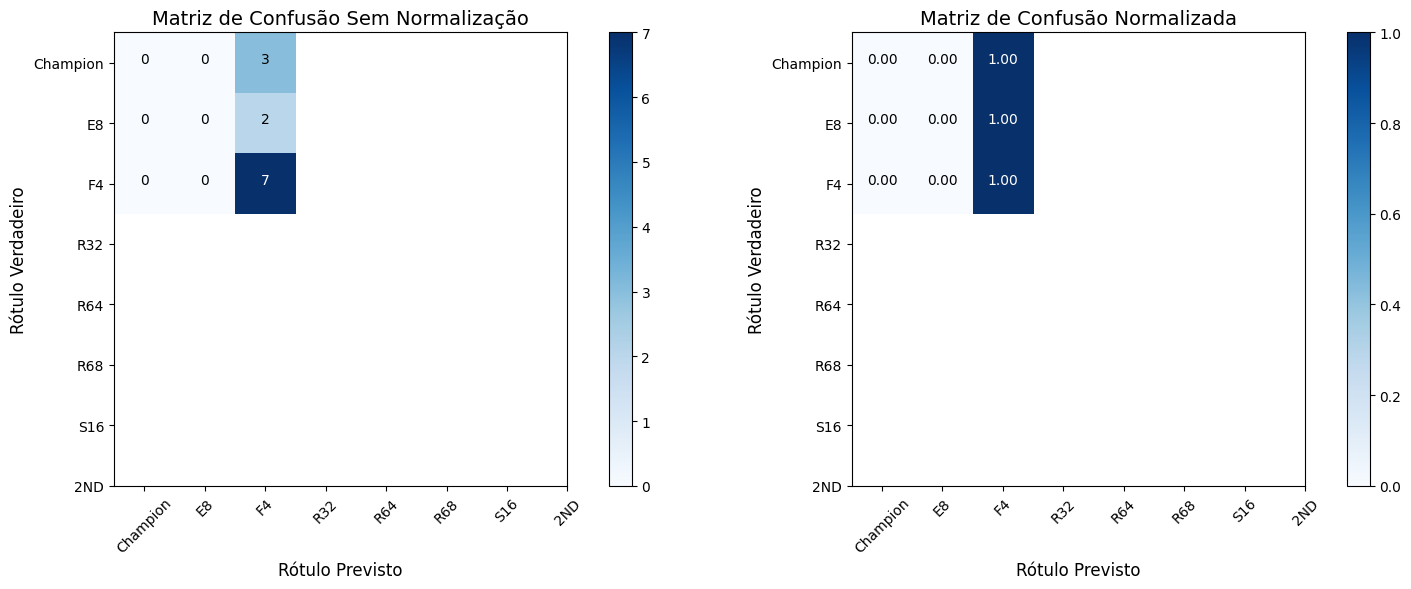

In [29]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusão', cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.

    Parâmetros:
    - cm: matriz de confusão.
    - classes: lista de rótulos das classes.
    - normalize: se True, normaliza os valores da matriz.
    - title: título do gráfico.
    - cmap: mapa de cores para o gráfico.
    """

    # Normaliza a matriz de confusão se normalize=True
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão Sem Normalização')

    # Imprime a matriz de confusão
    print(cm)

    # Plota a matriz de confusão
    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Exibe a matriz como uma imagem
    plt.title(title, fontsize=14)  # Define o título do gráfico
    plt.colorbar()  # Adiciona a barra de cores
    tick_marks = np.arange(len(classes))  # Cria marcadores para os eixos
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10)  # Define os rótulos do eixo x
    plt.yticks(tick_marks, classes, fontsize=10)  # Define os rótulos do eixo y

    # Adiciona os valores nas células da matriz
    thresh = cm.max() / 2.0  # Define o limite para a cor do texto
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]:.2f}' if normalize else f'{int(cm[i, j])}',
                 horizontalalignment="center",  # Alinha o texto ao centro
                 color="white" if cm[i, j] > thresh else "black")  # Define a cor do texto

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.ylabel('Rótulo Verdadeiro', fontsize=12)  # Define o rótulo do eixo y
    plt.xlabel('Rótulo Previsto', fontsize=12)  # Define o rótulo do eixo x


# Calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_val, y_pred_svm)  # Substitua y_val e y_pred_svm pelos seus dados
np.set_printoptions(precision=2)  # Define a precisão da impressão dos números

# Classes dos rótulos
class_labels = ['Champion', 'E8', 'F4', 'R32', 'R64', 'R68', 'S16', '2ND']

# Plota as matrizes de confusão lado a lado
plt.figure(figsize=(16, 6))  # Define o tamanho da figura

# Matriz de confusão não normalizada
plt.subplot(1, 2, 1)  # Cria o primeiro subplot (esquerda)
plot_confusion_matrix(cnf_matrix, classes=class_labels, title='Matriz de Confusão Sem Normalização')

# Matriz de confusão normalizada
plt.subplot(1, 2, 2)  # Cria o segundo subplot (direita)
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True, title='Matriz de Confusão Normalizada')

plt.show()  # Exibe os gráficos

## **4. Regressão Logística: `logreg_model`**

---



In [30]:
from sklearn.linear_model import LogisticRegression

# Criação do modelo de Regressão Logística com C=0.01
logreg_model = LogisticRegression(
    solver='liblinear',  # Solucionador eficiente para problemas menores
    random_state=42,     # Garante reprodutibilidade
    max_iter=1000,       # Número de iterações elevado para garantir convergência
    class_weight='balanced',  # Lida com classes desbalanceadas ajustando os pesos automaticamente
    C=0.01               # Define a força da regularização inversa
)

# Treinamento do modelo
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [31]:
# Previsões no conjunto de validação
y_pred_logreg = logreg_model.predict(X_val)

y_pred_logreg[:5]

array(['S16', 'S16', 'E8', 'S16', 'E8'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Avalie o modelo
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print(f"Acurácia do modelo de Regressão Logística: {accuracy_logreg:.4f}\n")

# Relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_val, y_pred_logreg))

Acurácia do modelo de Regressão Logística: 0.6667

Relatório de classificação:
              precision    recall  f1-score   support

          E8       0.50      0.67      0.57         3
          F4       1.00      0.50      0.67         2
         S16       0.71      0.71      0.71         7

    accuracy                           0.67        12
   macro avg       0.74      0.63      0.65        12
weighted avg       0.71      0.67      0.67        12



In [33]:
# Matriz de Confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_val, y_pred_logreg)
print(conf_matrix)

Matriz de Confusão:
[[2 0 1]
 [0 1 1]
 [2 0 5]]


## **Avaliação Comparativa entre os modelos, usando conjunto de teste**

---



In [34]:
from sklearn.metrics import f1_score, jaccard_score, log_loss, accuracy_score

# Lista dos modelos e seus nomes
modelos = {
    "KNN": knn_model,
    "Decision Tree": dt_model,
    "SVM": svm_model,
    "Logistic Regression": logreg_model
}

# Inicializa dicionários para armazenar os resultados
accuracies = {}
jaccard_scores = {}
f1_scores = {}
log_losses = {}

# Calcula as métricas para cada modelo
for nome, modelo in modelos.items():
    # Faz previsões no conjunto de validação
    y_pred = modelo.predict(X_val)

    # Calcula Acurácia
    accuracy = accuracy_score(y_val, y_pred)
    accuracies[nome] = accuracy

    # Calcula Jaccard Score
    jaccard = jaccard_score(y_val, y_pred, average='micro')
    jaccard_scores[nome] = jaccard

    # Calcula F1 Score
    f1 = f1_score(y_val, y_pred, average='micro')
    f1_scores[nome] = f1

    # Calcula Log Loss (apenas para modelos de classificação)
    try:
        y_pred_proba = modelo.predict_proba(X_val)
        logloss = log_loss(y_val, y_pred_proba)
        log_losses[nome] = logloss
    except AttributeError:
        log_losses[nome] = "N/A"  # Modelo não suporta predict_proba

    # Exibe os resultados para o modelo atual
    print(f"\n{nome} Model")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Jaccard Score: {jaccard:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if isinstance(log_losses[nome], (int, float)):
        print(f"Log Loss: {log_losses[nome]:.4f}")
    else:
        print(f"Log Loss: {log_losses[nome]}")  # Print as is if it's not a number

# Imprime a tabela comparativa na ordem solicitada
print("\nTabela Comparativa:")
print("-" * 65)
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Jaccard", "F1-Score", "LogLoss"))
print("-" * 65)
for nome in modelos:
    log_loss_value = f"{log_losses[nome]:.4f}" if isinstance(log_losses[nome], (int, float)) else log_losses[nome]
    print("{:<20} {:<10.4f} {:<10.4f} {:<10.4f} {:<10}".format(
        nome, accuracies[nome], jaccard_scores[nome], f1_scores[nome], log_loss_value))
print("-" * 65)


KNN Model
Accuracy: 0.5000
Jaccard Score: 0.3333
F1 Score: 0.5000
Log Loss: 3.6605

Decision Tree Model
Accuracy: 0.5000
Jaccard Score: 0.3333
F1 Score: 0.5000
Log Loss: 18.0218

SVM Model
Accuracy: 0.5833
Jaccard Score: 0.4118
F1 Score: 0.5833
Log Loss: N/A

Logistic Regression Model
Accuracy: 0.6667
Jaccard Score: 0.5000
F1 Score: 0.6667
Log Loss: 0.9205

Tabela Comparativa:
-----------------------------------------------------------------
Model                Accuracy   Jaccard    F1-Score   LogLoss   
-----------------------------------------------------------------
KNN                  0.5000     0.3333     0.5000     3.6605    
Decision Tree        0.5000     0.3333     0.5000     18.0218   
SVM                  0.5833     0.4118     0.5833     N/A       
Logistic Regression  0.6667     0.5000     0.6667     0.9205    
-----------------------------------------------------------------


## **Análise de Desempenho dos Modelos**

1. **KNN (K-Nearest Neighbors**): desempenho moderado, mas com um Log Loss (3.66) relativamente alto: a confiança nas predições não é boa.

2. **Decision Tree**: apesar de ter métricas de precisão similares ao KNN, o Log Loss é muito alto (18.02), sugerindo que o modelo tem uma confiabilidade muito baixa.

3. **SVM (Support Vector Machine)**: métricas de precisão melhores que KNN e Decision Tree, com melhoria na Jaccard e F1 Score, sugerindo que o modelo está capturando padrões melhores.

4. **Logistic Regression**: apresenta os melhores resultados em todas as métricas disponíveis, com um Log Loss significativamente menor (0.92), indicando maior confiança nas predições em relação aos demais. Sendo, portanto, o mais recomendado para abordar o problema.